## Importing Data

We are going to take a look at bike traffic on [Fremont Bridge](https://www.openstreetmap.org/#map=18/47.64782/-122.34999)

In [93]:
!curl -o ./data/FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1616k    0 1616k    0     0   945k      0 --:--:--  0:00:01 --:--:--  944k


In [196]:
ls ./data

1743441.csv	   HousePriceData/   loan-prediction.csv*
FremontBridge.csv  iris_dataset.csv  melb_data.csv*


## Preparing Data

In [239]:
import pandas as pd

In [240]:
counts = pd.read_csv('./data/FremontBridge.csv', index_col='Date', parse_dates=True)

In [241]:
counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-04-30 23:00:00,8.0,16.0
2019-04-30 22:00:00,15.0,29.0
2019-04-30 21:00:00,17.0,54.0
2019-04-30 20:00:00,58.0,91.0
2019-04-30 19:00:00,106.0,175.0


In [242]:
counts.index.min()

Timestamp('2012-10-03 00:00:00')

In [243]:
counts.index.max()

Timestamp('2019-04-30 23:00:00')

So we need the [weather](https://www.ncdc.noaa.gov/cdo-web/search?datasetid=GHCND) between those two days for station USW00024233.

That station is for the Seattle Airport:
SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US (GHCND:USW00024233)

The data has the following characteristics:

* WSF2 - Fastest 2-minute wind speed
* WSF5 - Fastest 5-second wind speed
* SNOW - Snowfall
* WT14 - Drizzle
* WT03 - Thunder
* WT04 - Ice pellets, sleet, snow pellets, or small hail" 
* PRCP - Precipitation
* WT05 - Hail (may include small hail)
* WT16 - Rain (may include freezing rain, drizzle, and freezing drizzle)" 
* WT18 - Snow, snow pellets, snow grains, or ice crystals
* WT08 - Smoke or haze 
* SNWD - Snow depth
* WT09 - Blowing or drifting snow
* WDF2 - Direction of fastest 2-minute wind
* AWND - Average wind speed
* WDF5 - Direction of fastest 5-second wind
* PGTM - Peak gust time
* WT22 - Ice fog or freezing fog
* WT01 - Fog, ice fog, or freezing fog (may include heavy fog)
* TMAX - Maximum temperature
* WT02 - Heavy fog or heaving freezing fog (not always distinguished from fog)
* WT13 - Mist
* TAVG - Average Temperature.
* TMIN - Minimum temperature

In [244]:
weather = pd.read_csv('./data/1743441.csv', index_col='DATE', parse_dates=True)

In [245]:
weather.head()

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT03,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-10-03,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",16.33,NaN,0.0,0.0,0.0,NaN,66,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-04,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",14.54,NaN,0.0,0.0,0.0,NaN,66,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-05,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",12.75,NaN,0.0,0.0,0.0,NaN,71,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-06,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",11.41,NaN,0.0,0.0,0.0,NaN,75,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-07,USW00024233,"SEATTLE TACOMA INTERNATIONAL AIRPORT, WA US",2.91,NaN,0.0,0.0,0.0,NaN,75,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
# move bicycle counts to daily instead of hourly
day_counts = counts.resample('d').sum()

In [247]:
day_counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03,1760.0,1761.0
2012-10-04,1708.0,1767.0
2012-10-05,1558.0,1590.0
2012-10-06,1080.0,926.0
2012-10-07,1191.0,951.0


In [248]:
day_counts['Totals'] = day_counts.sum(axis=1) # add bicycle trips going both ways.

In [249]:
day_counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Totals
Date,,,
2012-10-03,1760.0,1761.0,3521.0
2012-10-04,1708.0,1767.0,3475.0
2012-10-05,1558.0,1590.0,3148.0
2012-10-06,1080.0,926.0,2006.0
2012-10-07,1191.0,951.0,2142.0


In [250]:
daily = day_counts[['Totals']] # get rid of the individual data as we don't need for this analysis

In [251]:
daily.iloc[0]

Totals    3521.0
Name: 2012-10-03 00:00:00, dtype: float64

We might need to differentiate weekends, so we'll add the day numbers (with sat and sun being 6 and 7)

In [252]:
daily['day_number'] = daily.index.weekday

/Users/joshua/miniconda/envs/stats/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [253]:
daily.head(7)

,Totals,day_number
Date,,
2012-10-03,3521.0,2
2012-10-04,3475.0,3
2012-10-05,3148.0,4
2012-10-06,2006.0,5
2012-10-07,2142.0,6
2012-10-08,3537.0,0
2012-10-09,3501.0,1


Not quite... we need each day of the week to be a column since it will be a dummy column (on or off for regression)

In [254]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.weekday == i).astype(float)

In [255]:
daily.head()

,Totals,day_number,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,,
2012-10-03,3521.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [256]:
daily = daily.drop("day_number", axis=1)

In [257]:
daily.head()

,Totals,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We'll also need to know holidays...

In [258]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2019')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))

In [259]:
daily.head()

,Totals,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


In [260]:
daily['holiday'].fillna(0, inplace=True)

we can get hours in the day by using the [Sunrise Equation](https://en.wikipedia.org/wiki/Sunrise_equation) and the latitude from the open map location from the bridge link above

In [261]:
import numpy as np

def hours_in_day(date, axis=23.44, latitude=47.65):
    # need to calc julian days from 12/21/2000
    days = (date - pd.datetime(2000,12,21)).days
    # hour angle = tan of latitude x tan of sun declination
    m = (1. - np.tan(np.radians(latitude))
        * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1-np.clip(m,0,2))) / 180

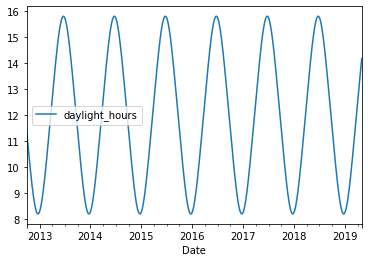

In [262]:
daily['daylight_hours'] = list(map(hours_in_day, daily.index))
daily[['daylight_hours']].plot();

Now we need to add the weather to help predict traffic

In [263]:
# we are given degress in F
# we also only have max and min, so we need to create a Temp column and assign it a temp.
# Usually temperatures hit a high and this is what people use to plan for the day. However,
# biking occurs early and later... so I will use 80% between min and max for the ride temp.

weather['Temp (F)'] = ((weather['TMAX'] - weather['TMIN']) * 0.8) + weather['TMIN']

In [264]:
# We are given perc in inches
weather['dry_day'] = (weather['PRCP']==0).astype(int) #boolean to integer (true to 1)

In [266]:
daily = daily.join(weather[['PRCP', 'Temp (F)', 'dry_day']])

In [267]:
daily.head()

,Totals,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hours,PRCP,Temp (F),dry_day
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.276342,0.0,62.0,1
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.218042,0.0,62.2,1
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.159856,0.0,66.4,1
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.101792,0.0,69.2,1
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.043861,0.0,69.2,1


We can try to find trend data by looking at years past (more or less people ride their bikes as time goes on). Also known as drift in looking at trends.

In [268]:
daily['years_since'] = (daily.index - daily.index[0]).days / 365

In [269]:
daily.head()

,Totals,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hours,PRCP,Temp (F),dry_day,years_since
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.276342,0.0,62.0,1,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.218042,0.0,62.2,1,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.159856,0.0,66.4,1,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.101792,0.0,69.2,1,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.043861,0.0,69.2,1,0.010959


## Building Model

In [270]:
# Set columns to use for regression
# by assigning to a variable, it is easier to change later
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hours', 'PRCP', 'Temp (F)', 'dry_day', 'years_since']
X = daily[column_names]
y = daily['Totals']

In [271]:
# create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)

In [272]:
## fit the model
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [273]:
## created a predicted column
daily['predicted'] = model.predict(X)

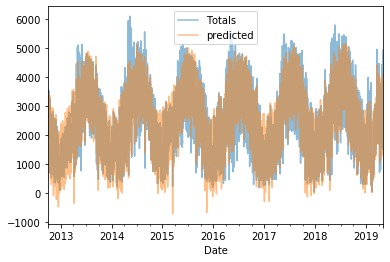

In [274]:
daily[['Totals', 'predicted']].plot(alpha=0.5);

In [275]:
# There are peaks in the summer we are missing - maybe events or traffic data that we didn't pull in
# We can estimate traffic moving forward now with the following coefficients
coef = pd.Series(model.coef_, index=X.columns)
coef

Mon               -607.724516
Tue               -477.877994
Wed               -506.504241
Thu               -647.469836
Fri               -962.643678
Sat              -2315.430844
Sun              -2397.531699
holiday          -1219.576798
daylight_hours      96.196510
PRCP              -699.864635
Temp (F)            40.752708
dry_day            440.430551
years_since         40.356255
dtype: float64

In [276]:
## Lets add some error to see how confident we are
from sklearn.utils import resample
np.random.seed(5)
err = np.std([model.fit(*resample(X,y)).coef_
             for i in range(1000)], 0)

In [277]:
print(pd.DataFrame({
    'effect': coef.round(0),
    'error': err.round(0)
}))

                effect  error
Mon             -608.0   68.0
Tue             -478.0   65.0
Wed             -507.0   66.0
Thu             -647.0   66.0
Fri             -963.0   64.0
Sat            -2315.0   62.0
Sun            -2398.0   63.0
holiday        -1220.0   99.0
daylight_hours    96.0    6.0
PRCP            -700.0   47.0
Temp (F)          41.0    1.0
dry_day          440.0   25.0
years_since       40.0    5.0


In [278]:
#reads like this:
print("For every additional hour of daylight, 96 +/- 6 additional people ride their bikes")

For every additional hour of daylight, 96 +/- 6 additional people ride their bikes
